In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


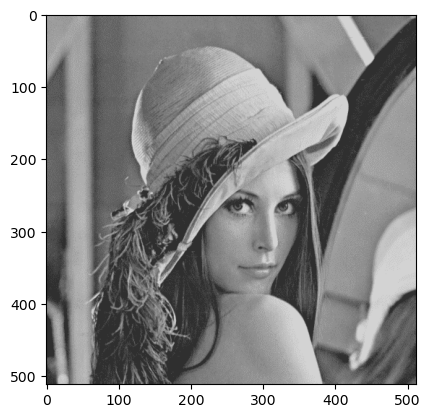

In [55]:
GIRAFFE = cv2.cvtColor(cv2.imread("./lectures/edge_detection/girl-min.png"), cv2.COLOR_BGR2RGB)
plt.imshow(GIRAFFE)

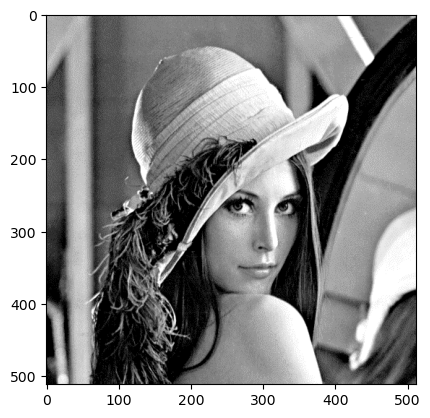

In [56]:
GIRAFFE_GRAYSCALE = cv2.cvtColor(GIRAFFE, cv2.COLOR_RGB2GRAY)
plt.imshow(GIRAFFE_GRAYSCALE, cmap="gray")

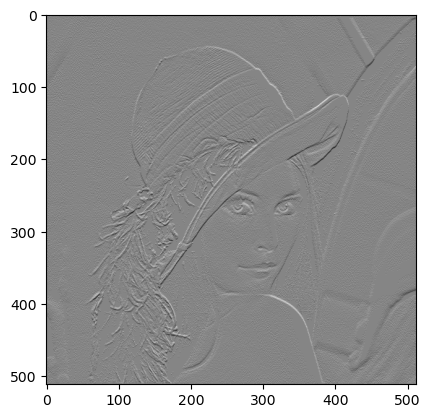

In [57]:
discrete_x_derivative = np.array([-1, 1])
GIRAFFE_X_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative)
plt.imshow(GIRAFFE_X_DERIVATIVE, cmap="gray")

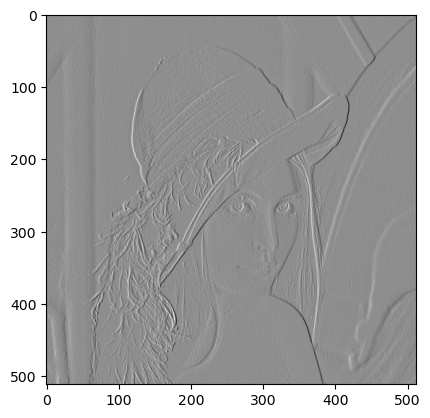

In [58]:
discrete_y_derivative = np.array([[-1, 1]])
GIRAFFE_Y_DERIVATIVE = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative)
plt.imshow(GIRAFFE_Y_DERIVATIVE, cmap="gray")

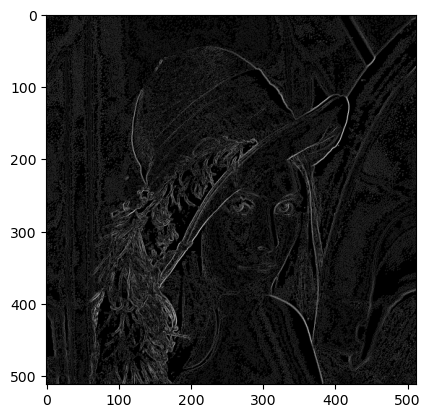

In [59]:
DERRIVATIVE_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE) + np.square(GIRAFFE_Y_DERIVATIVE))
plt.imshow(DERRIVATIVE_STRENGHT, cmap="gray")

In [77]:
N = 3
O = 1
discrete_x_derivative_blurred = np.convolve(cv2.getGaussianKernel(N-1, O).reshape(-1), discrete_x_derivative)
discrete_y_derivative_blurred = np.convolve(cv2.getGaussianKernel(N-1, O).reshape(-1), discrete_y_derivative.reshape(-1)).reshape(N, 1)

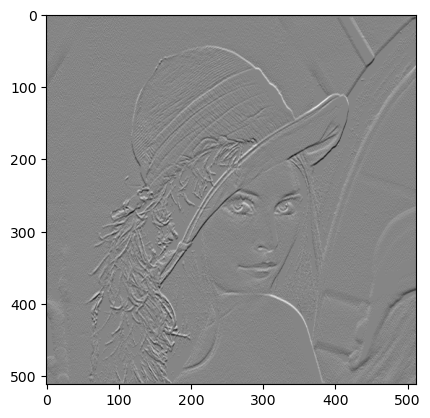

In [78]:
GIRAFFE_X_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_x_derivative_blurred)
plt.imshow(GIRAFFE_X_DERIVATIVE_BLURRED, cmap="gray")

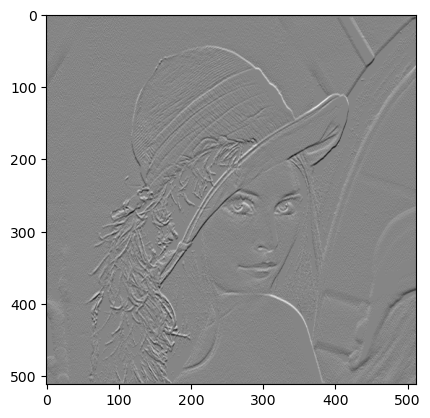

In [79]:
GIRAFFE_Y_DERIVATIVE_BLURRED = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=discrete_y_derivative_blurred)
plt.imshow(GIRAFFE_Y_DERIVATIVE_BLURRED, cmap="gray")

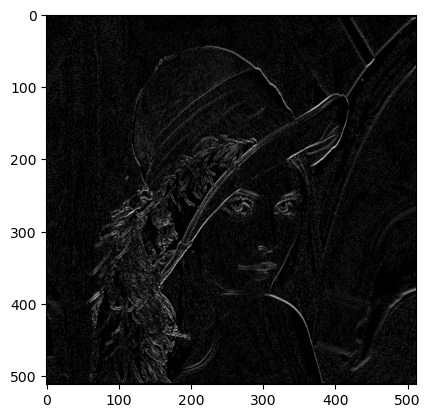

In [80]:
DERRIVATIVE_BLURRED_STRENGHT = np.sqrt(np.square(GIRAFFE_X_DERIVATIVE_BLURRED) + np.square(GIRAFFE_Y_DERIVATIVE_BLURRED))
plt.imshow(DERRIVATIVE_BLURRED_STRENGHT, cmap="gray")

In [64]:
sobel_x_derivative = np.array([ [-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1] ])
sobel_y_derivative = -np.transpose(sobel_x_derivative)

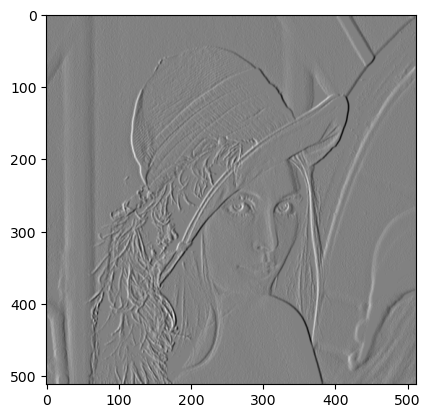

In [65]:
GIRAFFE_BY_SOBEL_X = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_x_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_X, cmap="gray")

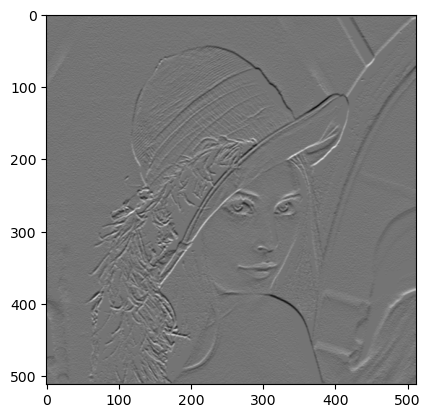

In [66]:
GIRAFFE_BY_SOBEL_Y = cv2.filter2D(GIRAFFE_GRAYSCALE, ddepth=3, kernel=sobel_y_derivative)
plt.imshow(GIRAFFE_BY_SOBEL_Y, cmap="gray")

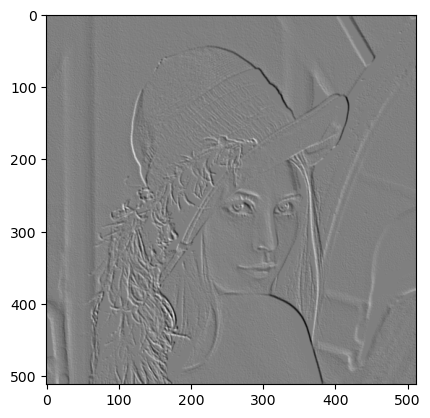

In [74]:
JOINED_SOBEL_GIRAFFE = (GIRAFFE_BY_SOBEL_X + GIRAFFE_BY_SOBEL_Y) / 2
plt.imshow(JOINED_SOBEL_GIRAFFE, cmap="gray")

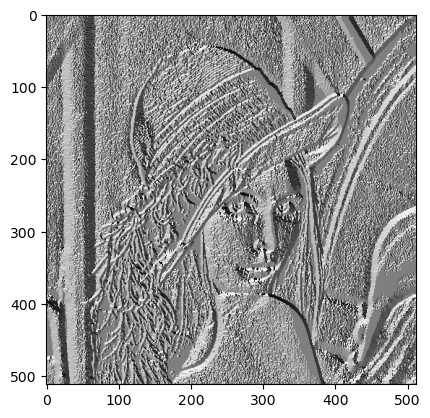

In [76]:
SOBEL_AGNLES = np.arctan2(GIRAFFE_BY_SOBEL_X, GIRAFFE_BY_SOBEL_Y)
plt.imshow(SOBEL_AGNLES, cmap="gray")

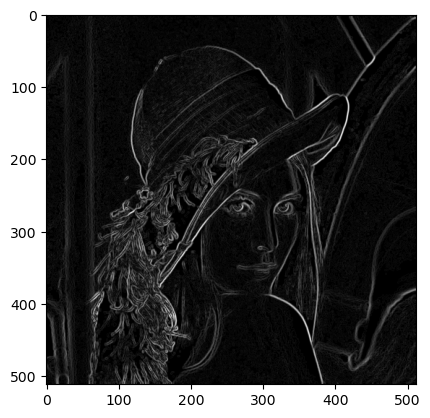

In [69]:
GIRAFFE_BY_SOBEL_X = GIRAFFE_BY_SOBEL_X.astype(np.float64)
GIRAFFE_BY_SOBEL_Y = GIRAFFE_BY_SOBEL_Y.astype(np.float64)
SOBEL_MAGNITUDE = np.sqrt(np.square(GIRAFFE_BY_SOBEL_X) + np.square(GIRAFFE_BY_SOBEL_Y))
plt.imshow(SOBEL_MAGNITUDE, cmap="gray")

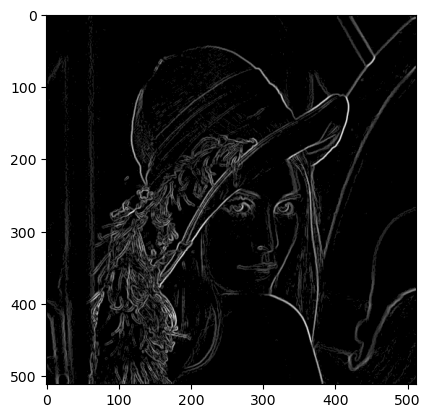

In [81]:
SOBEL_MAGNITUDE_THRESHOLDED = SOBEL_MAGNITUDE.copy()
SOBEL_MAGNITUDE_THRESHOLDED[SOBEL_MAGNITUDE_THRESHOLDED < 70] = 0
plt.imshow(SOBEL_MAGNITUDE_THRESHOLDED, cmap="gray")

In [82]:
from math import ceil, floor
LOCAL_MAXIMA = np.zeros_like(GIRAFFE_GRAYSCALE)
ANGLE_SIN = np.sin(SOBEL_AGNLES)
ANGLE_COS = np.cos(SOBEL_AGNLES)
rows, columns = LOCAL_MAXIMA.shape

def interpolate(px, py):
    neighbourPixels = [(ceil(px), ceil(py)), (ceil(px), floor(py)), (floor(px), ceil(py)), (floor(px), floor(py))]
    norms = [np.linalg.norm(np.array([px, py]) - np.array(p)) for p in neighbourPixels]
    importance = np.array([max(0, 1 - n) for n in norms])
    importance /= sum(importance)
    val = np.array([SOBEL_MAGNITUDE_THRESHOLDED[p[0], p[1]] for p in neighbourPixels])
    r = importance.dot(val)
    return r

for x in range(1, rows-1):
    for y in range(1, columns-1):
        x_change = ANGLE_COS[x, y]
        y_change = ANGLE_SIN[x, y]

        if x_change == 0 and y_change == 0:
            continue

        val = SOBEL_MAGNITUDE_THRESHOLDED[x, y]
        neighbour_one = interpolate(x + x_change, y + y_change)
        neighbour_two = interpolate(x - x_change, y - y_change)
        
        if neighbour_one < val > neighbour_two:
            LOCAL_MAXIMA[x, y] = 255


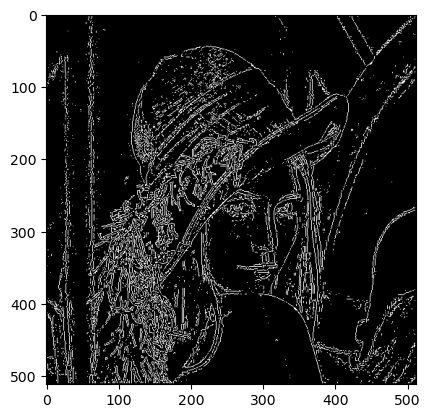

In [83]:
plt.imshow(LOCAL_MAXIMA, cmap="gray")